# Data Mining IT326 - Project 
# Group 4  (Airlines Customer satisfaction)

# 1- Problem:

Airline customer satisfaction is a critical factor for airlines' success. in today's competitive market, airlines must constantly strive to improve their customer satisfaction to attract and retain passengers.The dataset provided pertains to Invistico Airlines, an airline organization. It contains customer information, including feedback and flight data from previous passengers. The primary objective of this dataset is to predict the likelihood of satisfaction for potential future customers based on a range of parameter values. Furthermore, the airline aims to identify specific aspects of their services that require greater emphasis to ensure higher levels of customer satisfaction.

# 2- Data mining task:                    

Data mining within the scope of our dataset involves the utilization of advanced analytical techniques to uncover valuable insights and patterns relevant to airline customer satisfaction. The primary goal is to predict the class label that signifies whether a passenger is satisfied or dissatisfied with their airline experience through classification and clustering techniques. By applying data mining algorithms . The predictive aspect of data mining entails constructing predictive models that can categorize passengers into specific classes, such as "Satisfied" or "Not Satisfied," based on their characteristics and the identified influential factors. These models enable airlines to take proactive measures to enhance passenger satisfaction.

# 3- Dataset information:

This extensive dataset, comprising 129,880 rows and 23 columns, is sourced from diverse channels such as surveys, customer reviews, and social media data. It will undergo thorough data mining procedures aimed at uncovering the pivotal factors that influence customer satisfaction. These influential determinants span a broad spectrum, encompassing variables such as service quality, ticket pricing, flight reliability, and more

    Data dictionary:                                   

|Attribute|Description|Type|Possible Values|
|-----|-----|-----|----|
|Satisfaction| whether the client is satisfied or not| Binary |Satisfied - Dissatisfied|
|Gender|the gender of the client| Binary | Female - Male|
|Customer Type|whether the client is loyal or not| Binary |Loyal Customer - Disloyal Customer|
|Age|The age of the customer| Numeric| Between 7 - 85 |
|Type of travel|Purpose of the flight| Binary |Personal travel - Business travel|
|Class|Type of airplane seat | Nominal |Eco - Eco plus - Business|
|Flight Distance|how long is the flight distance| Numeric | From 50 to 6951 
|Seat comfort|is the seat comfortable or not| Ordinal | From 0 to 5 |
|Departure/Arrival time convenient|if the time is convenient | Ordinal | From 0 to 5 |
|Food and drink|what is the quality of the food and drink| Ordinal | From 0 to 5 |
|Gate location|the client's rate about the gate location| Ordinal | From 0 to 5 |
|Inflight WiFi service|the client's rate for this service| Ordinal | From 0 to 5 |
|Inflight entertainment|if the flight contain an entertainment services | Ordinal | From 0 to 5 |
|Online support|the client's rate for this service| Ordinal | From 0 to 5 |
|Ease of Online Booking|the client's rate about the online booking | Ordinal | From 0 to 5 |
|On-board service|the client's rate about the On-board service| Ordinal | From 0 to 5 |
|Leg room service|does the client have a space for his legs| Ordinal | From 0 to 5 |
|Baggage handling|does the flight have this service and how is it| Ordinal | From 0 to 5 |
|Check-In service|the client's rate for this service| Ordinal | From 0 to 5 |
|Cleanliness|how clean is the plane| Ordinal | From 0 to 5 |
|Online boarding|the client's rate for this service| Ordinal | From 0 to 5 |
|Departure Delay in minutes|how many minutes does the Departure delayed| Numeric | From 0 to 1592 |
|Arrival Delay in minutes|how many minutes does the arrival delayed| Numeric | From 0 to 1584 |

In [1]:
data = read.csv("Invistico_Airline.csv")

Because of the overwhelming volume of objects, our computers are unable to efficiently process such a large dataset. As a result, we have opted to randomly delete a portion of the rows

In [2]:
nrow(data)

[1] 129880

In [3]:
# Set a random seed for reproducibility
set.seed(1234)

# Determine the number of rows you want to delete
num_rows_to_delete <- 120000  # Adjust this number as needed

# Generate random row indices to delete
rows_to_delete <- sample(nrow(data), num_rows_to_delete)

# Keep only the rows that are not in the rows_to_delete vector
data <- data[-rows_to_delete, ]
row_count <- nrow(data)
print(row_count)

[1] 9880


In [4]:
library(readr)
library(tidyr)
library(stringr)
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
install.packages("outliers")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [6]:
library(outliers)

In [7]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
23,satisfied,Female,Loyal Customer,25,Personal Travel,Eco,2122,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,satisfied,Female,Loyal Customer,35,Personal Travel,Eco,3695,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,satisfied,Female,Loyal Customer,26,Personal Travel,Eco,2408,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,satisfied,Female,Loyal Customer,10,Personal Travel,Eco,3209,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,satisfied,Male,Loyal Customer,34,Personal Travel,Eco,1816,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,satisfied,Female,Loyal Customer,11,Personal Travel,Eco,1761,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


In [8]:
print(data)

      satisfaction Gender     Customer.Type Age  Type.of.Travel    Class
23       satisfied Female    Loyal Customer  25 Personal Travel      Eco
30       satisfied Female    Loyal Customer  35 Personal Travel      Eco
34       satisfied Female    Loyal Customer  26 Personal Travel      Eco
37       satisfied Female    Loyal Customer  10 Personal Travel      Eco
50       satisfied   Male    Loyal Customer  34 Personal Travel      Eco
64       satisfied Female    Loyal Customer  11 Personal Travel      Eco
87       satisfied Female    Loyal Customer   9 Personal Travel      Eco
92       satisfied Female    Loyal Customer  33 Personal Travel      Eco
94       satisfied Female    Loyal Customer  23 Personal Travel Eco Plus
115      satisfied Female    Loyal Customer   9 Personal Travel      Eco
125      satisfied Female    Loyal Customer  32 Personal Travel      Eco
134      satisfied Female    Loyal Customer  64 Personal Travel      Eco
135      satisfied Female    Loyal Customer  37 Per

In [9]:
summary(data)

 satisfaction          Gender          Customer.Type           Age       
 Length:9880        Length:9880        Length:9880        Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :39.00  
                                                          Mean   :39.26  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 Type.of.Travel        Class           Flight.Distance  Seat.comfort  
 Length:9880        Length:9880        Min.   :  50    Min.   :0.000  
 Class :character   Class :character   1st Qu.:1370    1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :1939    Median :3.000  
                                       Mean   :1999    Mean   :2.838  
                                       3rd Qu.:2560  

# 4-Graph representations:

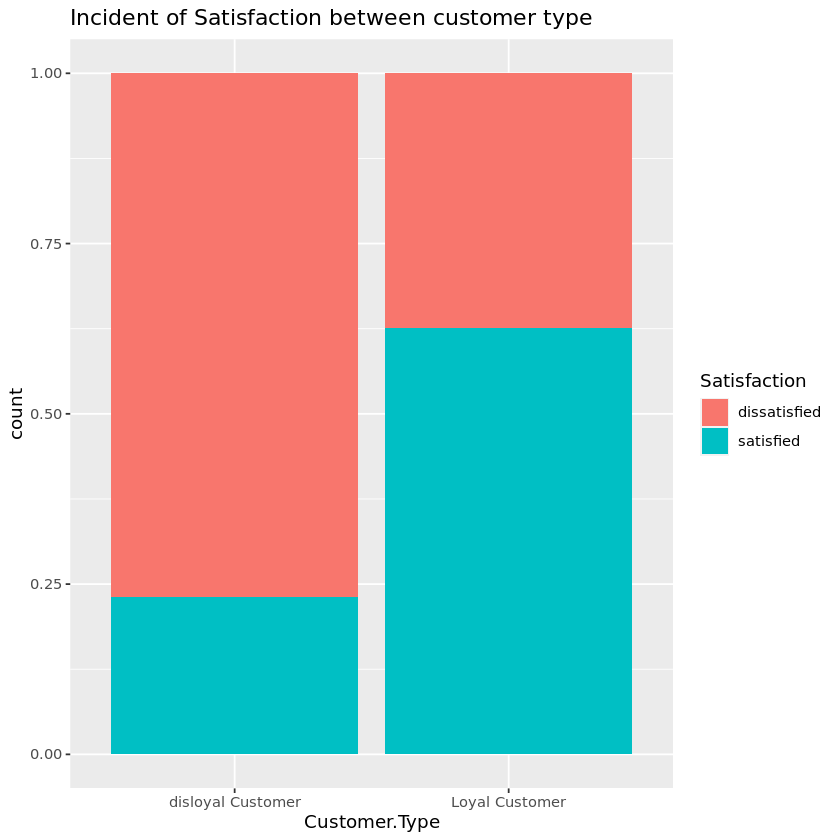

In [10]:
ggplot(data, aes(x = Customer.Type, fill = as.factor(satisfaction))) +
  geom_bar(position = "fill") +
  labs(fill = "Satisfaction", title= "Incident of Satisfaction between customer type")


The bar graph depicts the relationship between customer satisfaction and customer type. Our research reveals that loyal customers generally display higher levels of satisfaction in comparison to their disloyal counterparts.

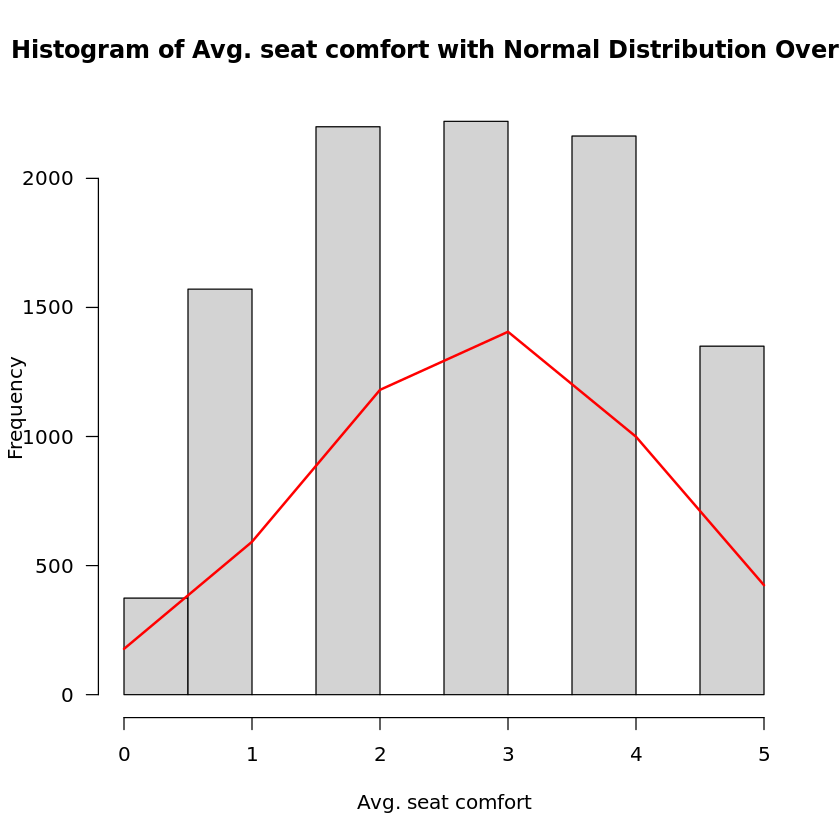

In [11]:
histglucose <- hist(data$Seat.comfort,xlim=c(0,5),
main="Histogram of Avg. seat comfort with Normal Distribution Overlay", xlab="Avg. seat comfort",las=1)
    xfit <- seq(min(data$Seat.comfort),max(data$Seat.comfort))
    yfit <- dnorm(xfit,mean=mean(data$Seat.comfort),sd=sd(data$Seat.comfort))
    yfit <- yfit*diff(histglucose$mids[1:2])*length(data$Seat.comfort)
    lines(xfit,yfit,col="red",lwd=2)

This histogram shows us the average of the seat comfort rating, and from the graph above we can see it's a left skewed, this show us the mean in this column is typically less than the median. Also, we can see the frequency start to increase when the rating reach 3.

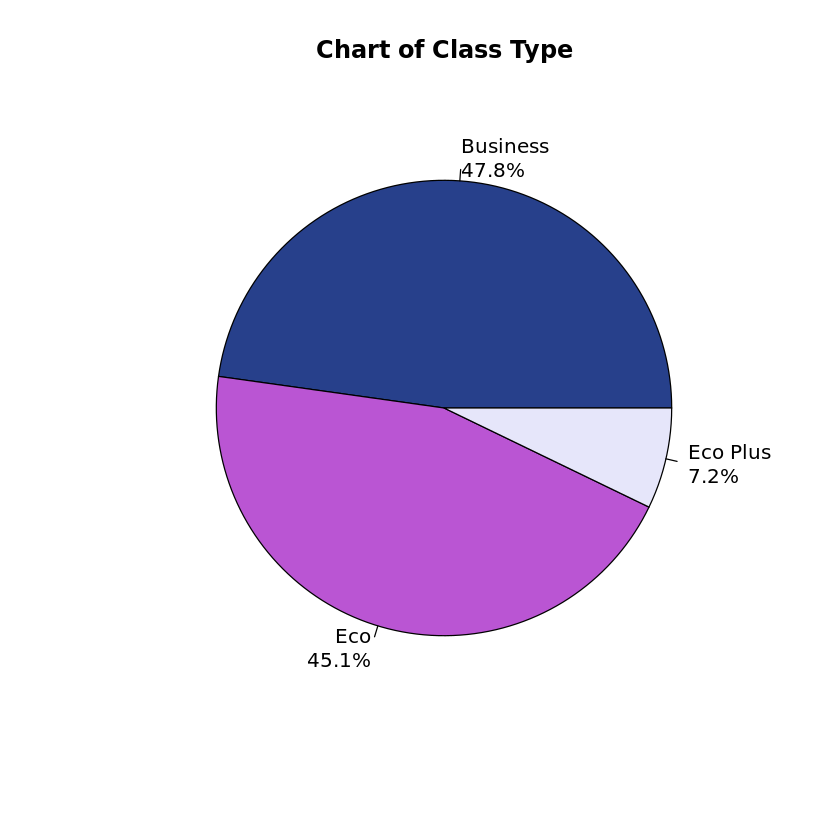

In [12]:
tab <- data$Class %>% table()
precentages <- tab %>% prop.table() %>% round(3) * 100 
txt <- paste0(names(tab), '\n', precentages, '%') # text on chart
colors <- c("royalblue4", "mediumorchid", "lavender")
pie(tab, labels=txt ,col = colors, main= "Chart of Class Type") # plot pie chart

This pie chart displays the distribution of passenger classes in our dataset, which is categorized as nominal data. The data reveals that Business Class passengers constitute the highest proportion at 47.8%, followed by Economy Class passengers at 45.1%, while the smallest percentage corresponds to Eco Plus Class passengers, accounting for 7.2% of the total.

# 5- Data preprocessing

# 5.1 -Data Cleaning :

Missing data can introduce challenges during data analysis or the construction of machine learning models since they have the potential to yield inaccurate results or generate errors. In our dataset, we proactively identified and addressed missing data by opting to replace those missing values with the mean.

In [13]:
#looking for missing data and datatypes for all feature
sum(is.na(data))

[1] 26

In [14]:
#looking for missing data and datatypes for each feature
sapply(data, function(x) sum(is.na(x)))

satisfaction                            Gender 
                                0                                 0 
                    Customer.Type                               Age 
                                0                                 0 
                   Type.of.Travel                             Class 
                                0                                 0 
                  Flight.Distance                      Seat.comfort 
                                0                                 0 
Departure.Arrival.time.convenient                    Food.and.drink 
                                0                                 0 
                    Gate.location             Inflight.wifi.service 
                                0                                 0 
           Inflight.entertainment                    Online.support 
                                0                                 0 
           Ease.of.Online.booking                  On.board.service 
                                0                                 0 
                 Leg.room.service                  Baggage.handling 
                                0                                 0 
                  Checkin.service                       Cleanliness 
                                0                                 0 
                  Online.boarding        Departure.Delay.in.Minutes 
                                0                                 0 
         Arrival.Delay.in.Minutes 
                               26

In [15]:
#handle the missing value by replacing it with the mean
data$Arrival.Delay.in.Minutes<- ifelse(
  is.na(data$Arrival.Delay.in.Minutes),
  round(mean(data$Arrival.Delay.in.Minutes, na.rm = TRUE)),
  data$Arrival.Delay.in.Minutes
)

In [16]:
#the result after we handle it
sum(is.na(data$Arrival.Delay.in.Minutes))

[1] 0

# 5.2 -Remove outliers :

We looked at our data and found some unusual values that don't fit in well with the rest. These odd values, called outliers, So, we needed to get rid of them before we started working on our project.

To do that, we used a tool called the Outliers package, which has a function called Outlier(). It helped us find and highlight the outlier data points in our dataset.

In [17]:
#find the outlier in Arrival Delay in Minutes
OutAM <- outlier(data$Arrival.Delay.in.Minutes)
print(OutAM)

[1] 822


In [18]:
#Remove Arrival.Delay.in.Minutes outlier
data <- data[data$Arrival.Delay.in.Minutes != OutAM, ]

In [19]:
#find the outlier in Flight Distance
OutFD <- outlier(data$Flight.Distance)
print(OutFD)

[1] 6907


In [20]:
#Remove Flight.Distance outlier
data <- data[data$Flight.Distance!= OutFD, ]

In [21]:
#find the outlier in Departure Delay in Minutes
OutDM <- outlier(data$Departure.Delay.in.Minutes)
print(OutDM)

[1] 581


In [22]:
#Remove Departure.Delay.in.Minutes outlier
data <- data[data$Departure.Delay.in.Minutes!= OutDM, ]

In [23]:
#find the outlier in Age
OutAG <- outlier(data$Age)
print(OutAG)

[1] 85


In [24]:
#Remove Age outlier
data <- data[data$Age!= OutAG, ]

# 5.3 - Data Transformation

5.3.1-Encoding

Encoding is crucial in data mining and machine learning because it changes raw data into a format algorithms can understand. This often means turning categories or words into numbers, making it easier for computers to work with and analyze the information.

In [25]:
# Replace 'Gender' column with 1(female) or 2(male)
data$Gender <- as.integer(factor(data$Gender, levels = unique(data$Gender)))

In [26]:
# Replace 'Customer Type' column with 1(loyal Customer) or 2(disloyal Customer) 
data$Customer.Type<- as.integer(factor(data$Customer.Type, levels = unique(data$Customer.Type)))

In [27]:
# Replace 'Type of Travel' column with 1(Personal Travel) or 2(Business travel)
data$Type.of.Travel<- as.integer(factor(data$Type.of.Travel, levels = unique(data$Type.of.Travel)))


In [28]:
# Replace 'Class' column with 1(Eco), 2(Business) or 3(Eco Plus)
data$Class <- as.integer(factor(data$Class, levels = unique(data$Class)))

In [29]:
# Define a dictionary to manually recode 'satisfied' to 1 and 'dissatisfied' to 0
dictionary <- c('dissatisfied' = 0, 'satisfied' = 1)

In [30]:
# Replace values in 'Satisfaction' column using the dictionary
data <- data %>% mutate(satisfaction = recode(satisfaction, !!!dictionary))

In [31]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
23,1,1,1,25,1,1,2122,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,1,1,1,35,1,1,3695,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,1,1,1,26,1,1,2408,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,1,1,1,10,1,1,3209,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,1,2,1,34,1,1,1816,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,1,1,1,11,1,1,1761,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


5.3.2 - Discretization

We have categorized flight distances into four finite elements: 0, 1400, 2800, 4200,  7000 and, inf. Into the showing labels 1 as short , 2 as medium, 3 as moderate, 4 as long , and 5 as very long ,This allows for detailed analysis and insights into various aspects of air travel.

In [32]:
#Assuming 'data' is your data frame and 'Flight.Distance' is the column to be discretized

# Define the bin edges and labels
bin.edges <- c(0, 1400, 2800, 4200, 7000, Inf)  # Modify these bins as needed
bin.labels <- c(1, 2, 3, 4, 5)

# Perform discretization using cut() function
data$Flight.Distance<- cut(data$Flight.Distance, breaks = bin.edges, labels = bin.labels)

# Now, the 'Flight Distance' column has been discretized into categories and stored in 'Flight.Distance.Category

In [33]:
print(data$Flight.Distance)

   [1] 2 3 2 3 2 2 2 3 2 2 2 1 2 2 2 2 2 1 1 2 2 2 3 2 2 2 1 1 2 3 1 3 2 1 2 2 2
  [38] 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 3 2 1 1 1 2 1 3 2 2 1 2 3 3 1 1 2 2 1 1
  [75] 2 3 2 2 2 1 2 1 2 2 2 3 3 3 2 2 2 2 1 1 2 3 2 3 2 2 1 2 2 2 2 1 2 1 1 1 1
 [112] 1 2 1 2 2 2 1 1 2 2 2 2 1 3 2 2 2 2 2 2 2 2 2 1 2 1 2 3 3 3 2 2 3 1 2 2 2
 [149] 1 2 2 2 2 2 2 2 2 2 1 1 2 3 2 2 3 1 2 2 2 2 2 2 1 2 2 1 1 2 2 1 1 1 3 2 2
 [186] 2 1 2 2 1 1 2 2 2 1 1 2 2 3 3 3 2 2 2 2 1 1 2 2 2 1 2 2 2 1 1 1 2 2 3 3 2
 [223] 2 3 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 1 3 2 1 2 2 3 2 2 1 1 2 3 2 1 2 3 1 2
 [260] 2 1 2 1 2 1 2 2 2 1 2 1 2 3 2 2 2 1 1 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 2 2
 [297] 2 3 3 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 1 1 2 1 1 2 1 2 3 3 3 1
 [334] 3 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 2 1 2 1 2
 [371] 2 1 1 1 2 1 3 2 3 2 2 3 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 1 1 2
 [408] 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 3 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 1 2 1 2 1 2
 [445] 2 2 2 2 1 1 1 1 2 2 2

5.3.3 - Normalization Min-Max Scaling :

We used a technique called max-min normalization to make sure our data was consistently scaled. This method adjusts the values of certain attributes to fit within a range from 0 to 1. We applied this normalization to three specific attributes: age, Arrival Delay in Minutes, and Departure Delay in Minutes. Normalizing the dataset in this way makes the attributes more uniform and comparable, which helps us perform accurate analysis and modeling for predicting satisfaction, as demonstrated in the results.

In [34]:
normalize <- function(x) { return ((x - min(x))/ (max(x)- min(x)))   }

In [35]:
data$Age=normalize(data$Age)

In [36]:
data$Arrival.Delay.in.Minutes=normalize(data$Arrival.Delay.in.Minutes)

In [37]:
data$Departure.Delay.in.Minutes=normalize(data$Departure.Delay.in.Minutes)

In [38]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
23,1,1,1,0.24657534,1,1,2,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,1,1,1,0.38356164,1,1,3,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,1,1,1,0.26027397,1,1,2,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,1,1,1,0.04109589,1,1,3,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,1,2,1,0.36986301,1,1,2,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,1,1,1,0.05479452,1,1,2,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


# 6 - Feature selection :

To simplify our predictive model, we'll use a feature selection technique known as Recursive Feature Elimination (RFE). This method is commonly used to pick out the most important input variables for predicting our target variable, which in our case is "satisfaction." Additionally, we'll utilize the varImp function, which helps us assess the importance of different variables in our analysis.

In [39]:
install.packages("mlbench")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [40]:
install.packages("caret")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [41]:
install.packages("randomForest")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [42]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:outliers’:

    outlier


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Loading required package: lattice



                     satisfaction            Inflight.entertainment 
                       2936.58499                         555.70793 
                     Seat.comfort            Ease.of.Online.booking 
                        232.46321                         217.84534 
                   Online.support                     Customer.Type 
                        165.16426                         100.34501 
                 On.board.service                   Online.boarding 
                         92.20038                          76.36363 
                            Class                  Leg.room.service 
                         76.07383                          71.11721 
                   Food.and.drink                            Gender 
                         64.07204                          48.35584 
                      Cleanliness                  Baggage.handling 
                         35.24962                          33.75700 
                   Type.of.Travel 

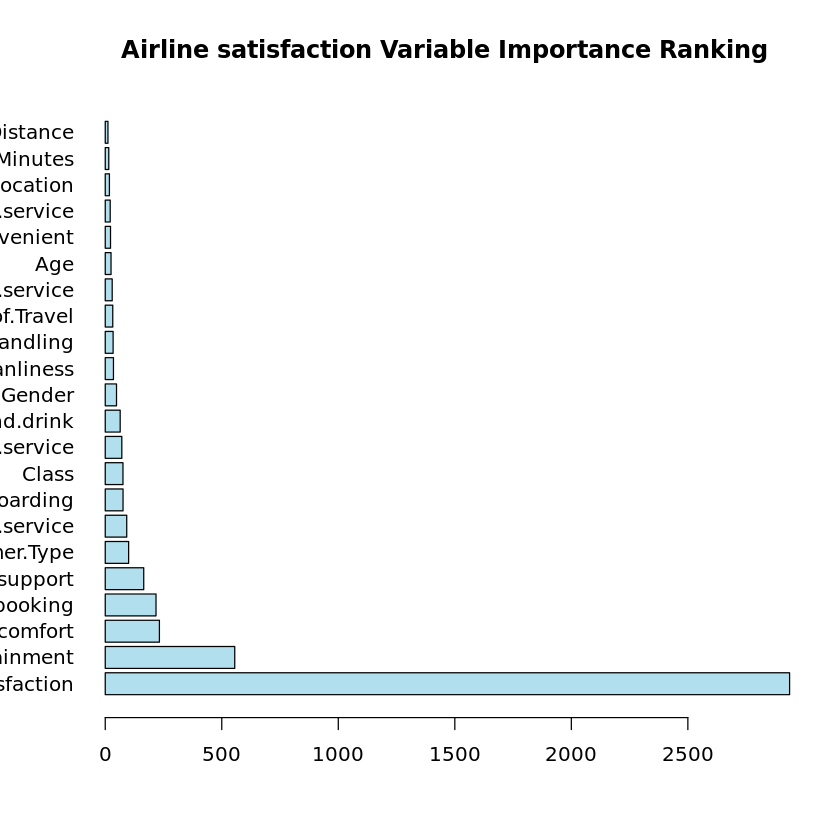

In [43]:
# ensure the results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# Convert the class label to a factor

data$satisfaction <- as.factor(data$satisfaction)



# Separate the predictors and the class label

predictors <- data[, -23]  # Excluding the class label (satisfaction)
class_label <- data$satisfaction


# Train a Random Forest model

model <- randomForest(predictors, class_label, importance = TRUE)



# Get the variable importance

importance <- importance(model)

ranked_features <- sort(importance[, "MeanDecreaseGini"], decreasing = TRUE)



# Print the ranked features
print(ranked_features)

barplot(ranked_features, horiz = TRUE, col = c("lightblue2"), las = 1, main = "Airline satisfaction Variable Importance Ranking")

After we do the feature selection we notice that the least importante attribute are (Flight.Distance, Departure.Delay.in.Minutes, Gate location) Therefore, we will remove them

In [44]:
#delete the coloumns
data <-data[,!names(data) %in% c("Flight.Distance", "Gate.location", "Departure.Delay.in.Minutes")]

Finally an overall head for our dataset

In [45]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
23,1,1,1,0.24657534,1,1,0,1,0,2,0,4,2,4,1,3,1,3,2,0
30,1,1,1,0.38356164,1,1,0,1,0,0,4,4,2,2,3,4,4,3,4,0
34,1,1,1,0.26027397,1,1,0,1,0,4,0,4,4,1,4,4,2,3,4,0
37,1,1,1,0.04109589,1,1,0,1,0,4,0,4,4,4,3,3,1,4,4,0
50,1,2,1,0.36986301,1,1,0,1,0,4,0,4,4,1,1,2,3,2,4,0
64,1,1,1,0.05479452,1,1,0,1,0,3,0,3,3,1,2,3,2,3,3,0


# imbalanced dataset problem:

kjhgfdsa

In [46]:
install.packages("ROSE")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)




  0   1 
0.5 0.5 

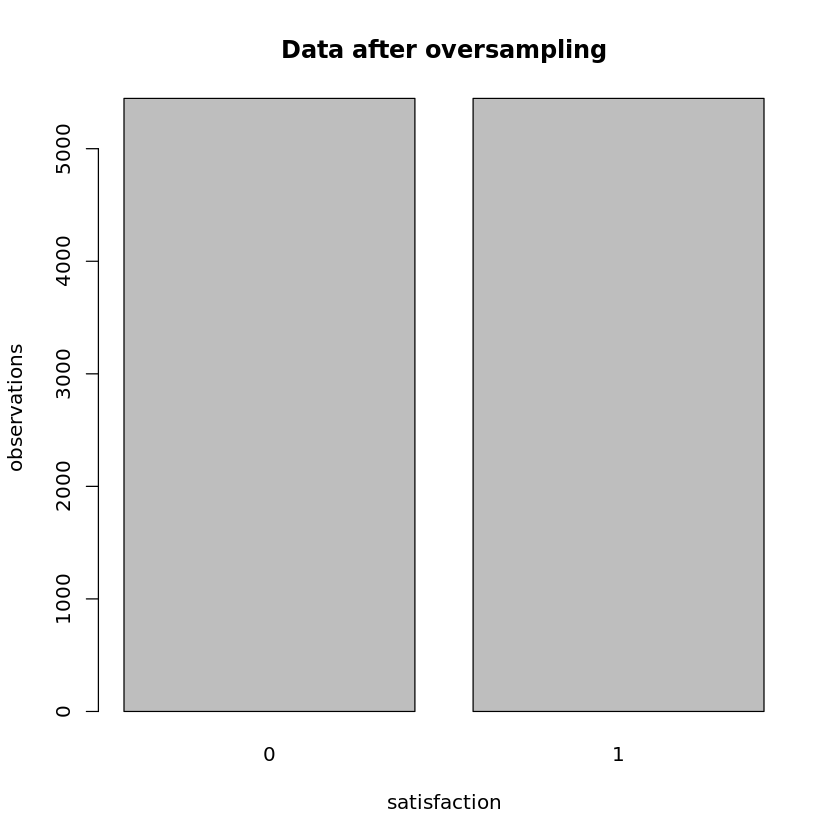

In [47]:
# upscaling the data
data<-upSample(data[,-1],data$satisfaction, yname="satisfaction")
plot(data$satisfaction)

# checking the number of stroke/ non-stroke observations
prop.table(table(data$satisfaction))
title(main="Data after oversampling", xlab="satisfaction", ylab="observations")

In [48]:
#Number of rows
nrow(data)

[1] 10894

In [49]:
head(data)

,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,2,1,0.71232877,1,2,1,0,1,1,4,3,2,5,3,3,3,2,3,0.483974359,0
2,2,1,0.24657534,1,1,1,0,1,4,1,4,4,1,2,3,5,1,4,0.198717949,0
3,2,1,0.67123288,1,3,1,0,1,4,4,5,3,3,1,3,3,3,4,0.003205128,0
4,2,1,0.32876712,1,1,1,0,1,2,1,2,2,4,1,4,5,5,2,0.000000000,0
5,2,1,0.02739726,1,1,1,0,1,5,1,5,5,4,4,5,4,5,5,0.000000000,0
6,2,1,0.67123288,1,1,1,0,1,2,1,4,2,5,4,5,5,4,2,0.000000000,0


In [50]:
install.packages("scatterplot3d")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [51]:
library(scatterplot3d)

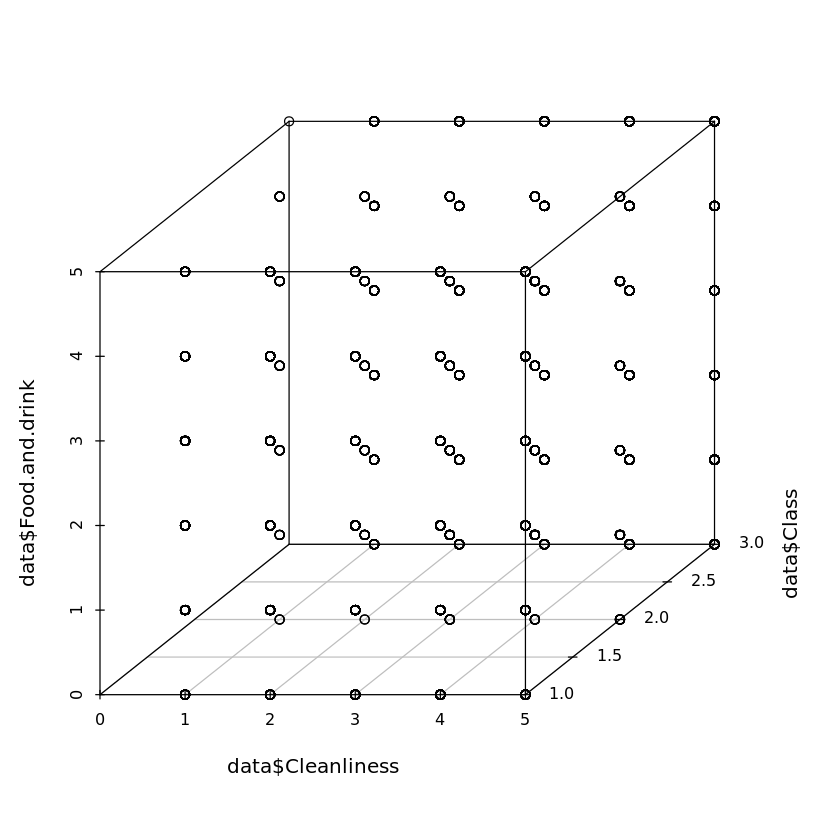

In [52]:
scatterplot3d(data$Cleanliness, data$Class, data$Food.and.drink)

# 7 - Data Mining Technique :


;lkjhtds

# 7.1 - Classification :


trashhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh

# 7.1.1 - information gain :

sdfghjkl; 

# First

In [53]:
install.packages('ipred')
library(ipred)   

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [56]:
install.packages("caTools")
library(caTools)
install.packages('rpart')
install.packages('rpart.plot')
library(rpart)
library(rpart.plot)
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.70)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



ERROR: Error in value[[3L]](cond): Package ‘rpart’ version 4.1.16 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘rpart’ is imported by ‘ipred’ so cannot be unloaded



In [57]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class', parms= list(split="information"))
rpart.plot(tree)

ERROR: Error in rpart(satisfaction ~ ., data = training_set, method = "class", : could not find function "rpart"


In [57]:

prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0 1388  246
  1  191 1443

[1] "Accuracy on test data is  0.866279069767442"


# second:

In [58]:
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.60)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

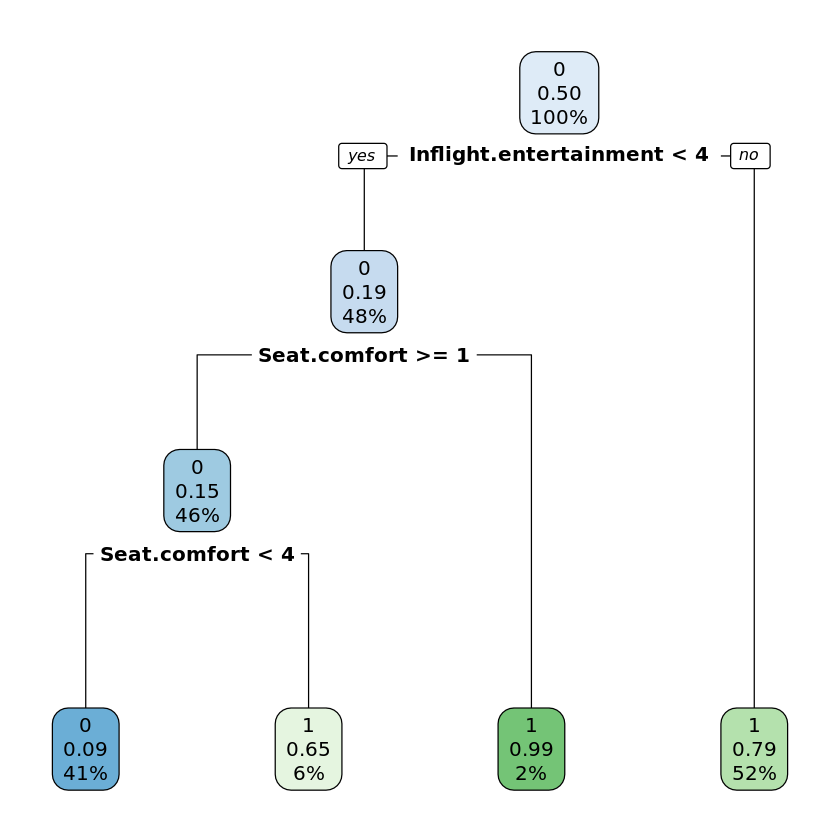

In [59]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class', parms= list(split="information"))
rpart.plot(tree)

In [60]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0 1593  586
  1  130 2049

[1] "Accuracy on test data is  0.835704451583295"


# Third

In [55]:
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.85)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

ERROR: Error in sample.split(data$satisfaction, SplitRatio = 0.85): could not find function "sample.split"


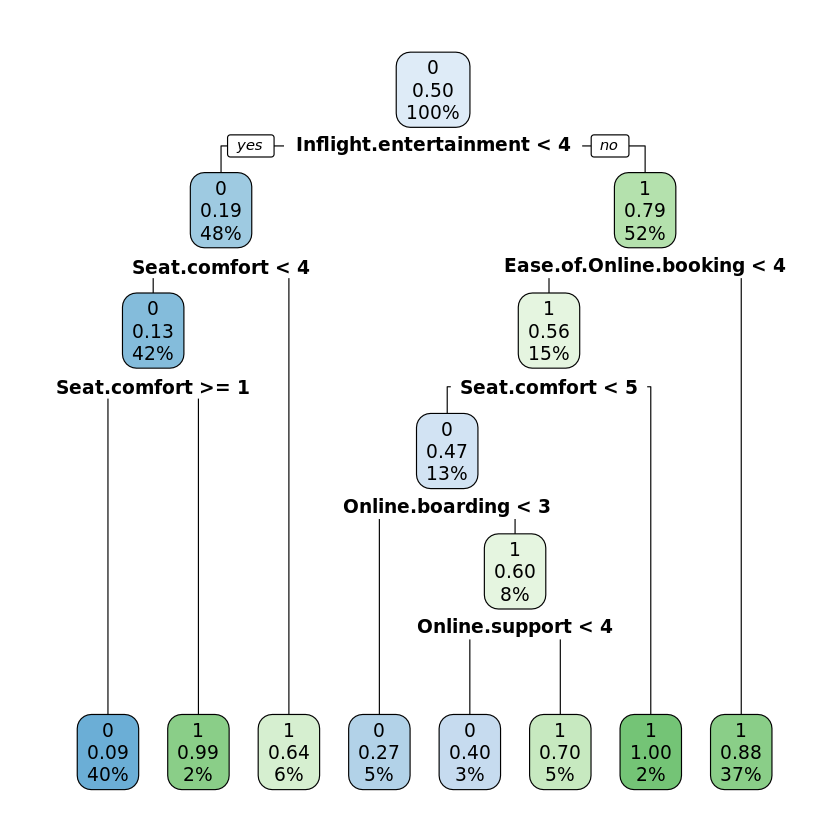

In [62]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [63]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 693 124
  1  82 735

[1] "Accuracy on test data is  0.873929008567931"


# 7.1.2- Gini index

# first split

In [64]:
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.70)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

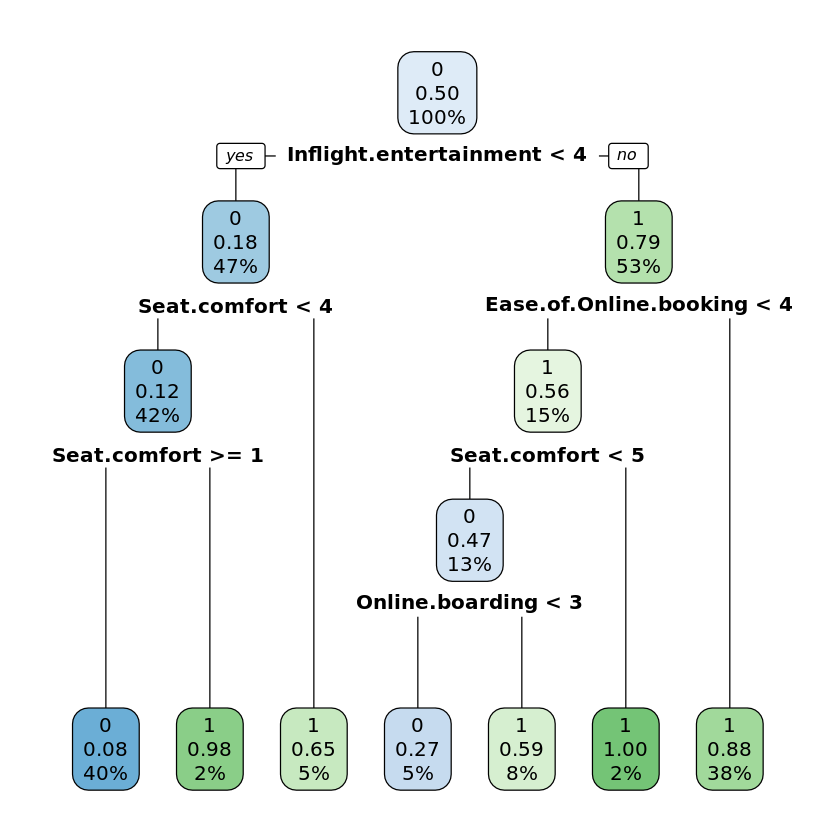

In [65]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [66]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0 1324  310
  1  151 1483

[1] "Accuracy on test data is  0.858935128518972"


# second split

In [67]:

set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.60)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

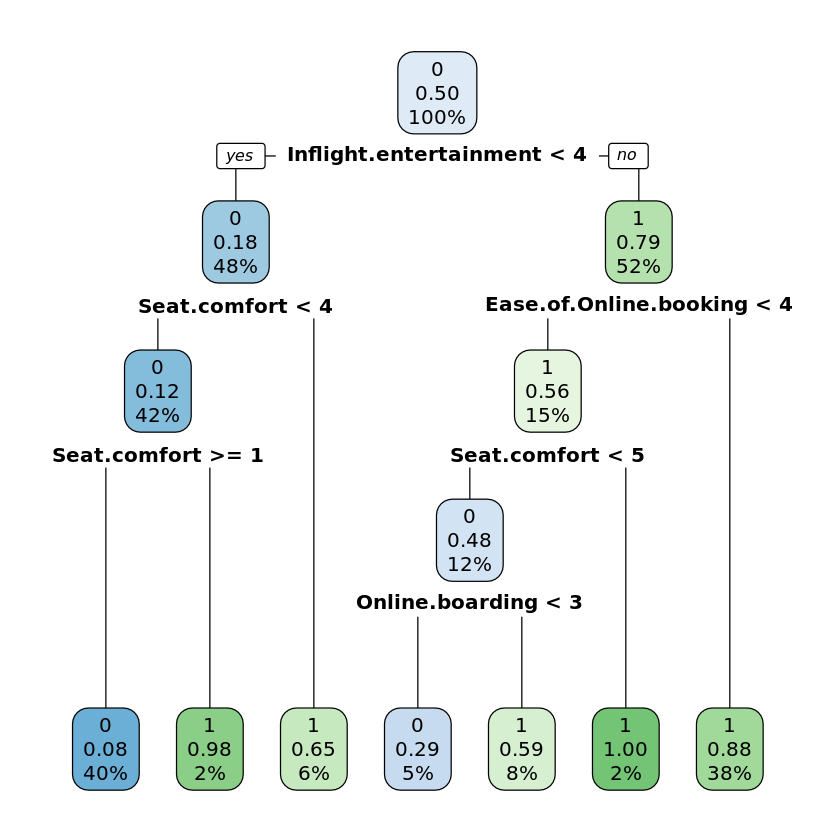

In [68]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [69]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0 1762  417
  1  203 1976

[1] "Accuracy on test data is  0.857732905002295"


# third split

In [70]:
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.85)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

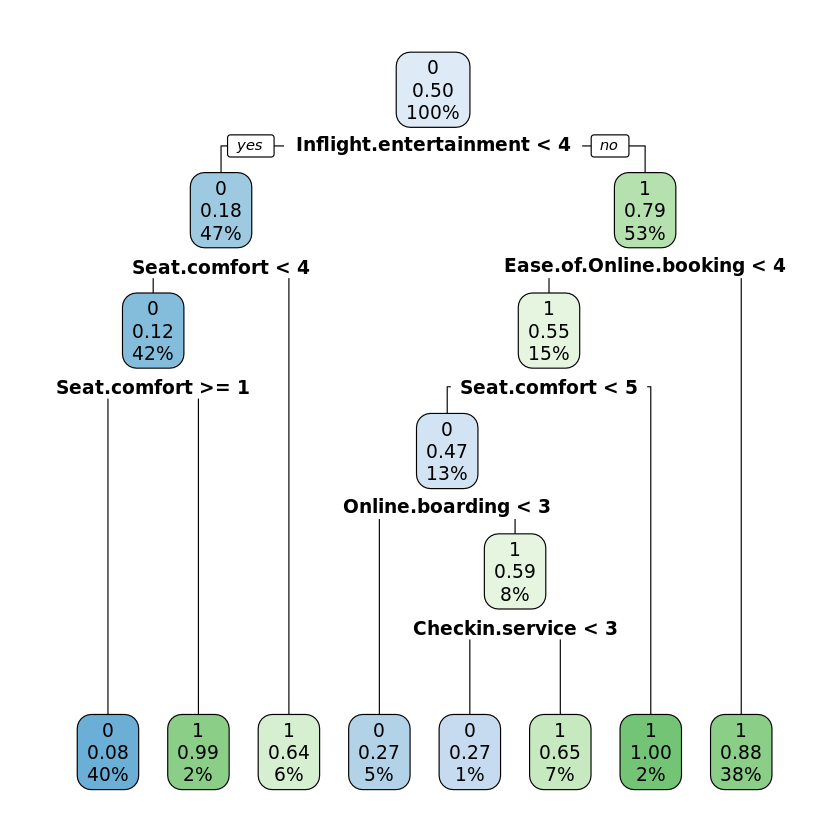

In [71]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [72]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 694 123
  1  86 731

[1] "Accuracy on test data is  0.872093023255814"


# 7.1.3- Gain ratio

# First

In [58]:
set.seed(1234)
ind=sample (2, nrow(data), replace=TRUE, prob=c(0.70 , 0.30))
trainData=data[ind==1,]
testData=data[ind==2,]

In [61]:
install.packages('party')
library(party)
myFormula <- satisfaction ~ Inflight.entertainment + Ease.of.Online.booking + Seat.comfort
satisfaction_ctree <- ctree(myFormula, data=trainData)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



   
       0    1
  0 3245  485
  1  591 3334


	 Conditional inference tree with 29 terminal nodes

Response:  satisfaction 
Inputs:  Inflight.entertainment, Ease.of.Online.booking, Seat.comfort 
Number of observations:  7655 

1) Inflight.entertainment <= 3; criterion = 1, statistic = 2077.862
  2) Ease.of.Online.booking <= 3; criterion = 1, statistic = 208.288
    3) Inflight.entertainment <= 0; criterion = 1, statistic = 65.114
      4) Seat.comfort <= 0; criterion = 1, statistic = 22.351
        5)*  weights = 66 
      4) Seat.comfort > 0
        6) Seat.comfort <= 3; criterion = 1, statistic = 19.185
          7)*  weights = 26 
        6) Seat.comfort > 3
          8)*  weights = 8 
    3) Inflight.entertainment > 0
      9) Seat.comfort <= 3; criterion = 1, statistic = 44.695
        10) Seat.comfort <= 0; criterion = 1, statistic = 28.703
          11) Ease.of.Online.booking <= 2; criterion = 0.994, statistic = 9.615
            12)*  weights = 16 
          11) Ease.of.Online.booking > 2
            13)*  weights = 7 
  

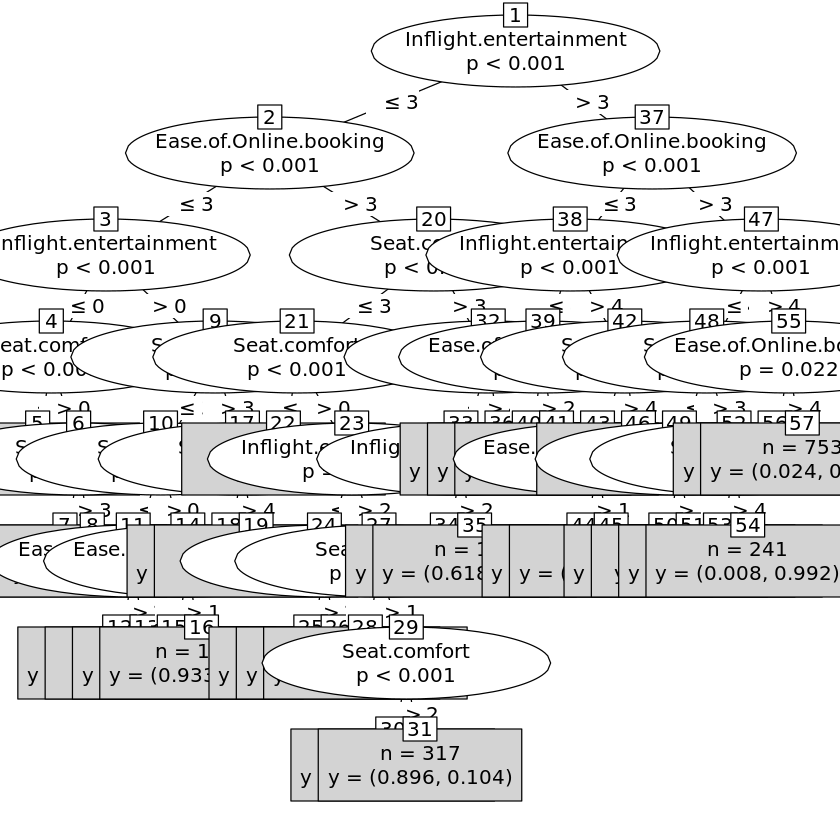

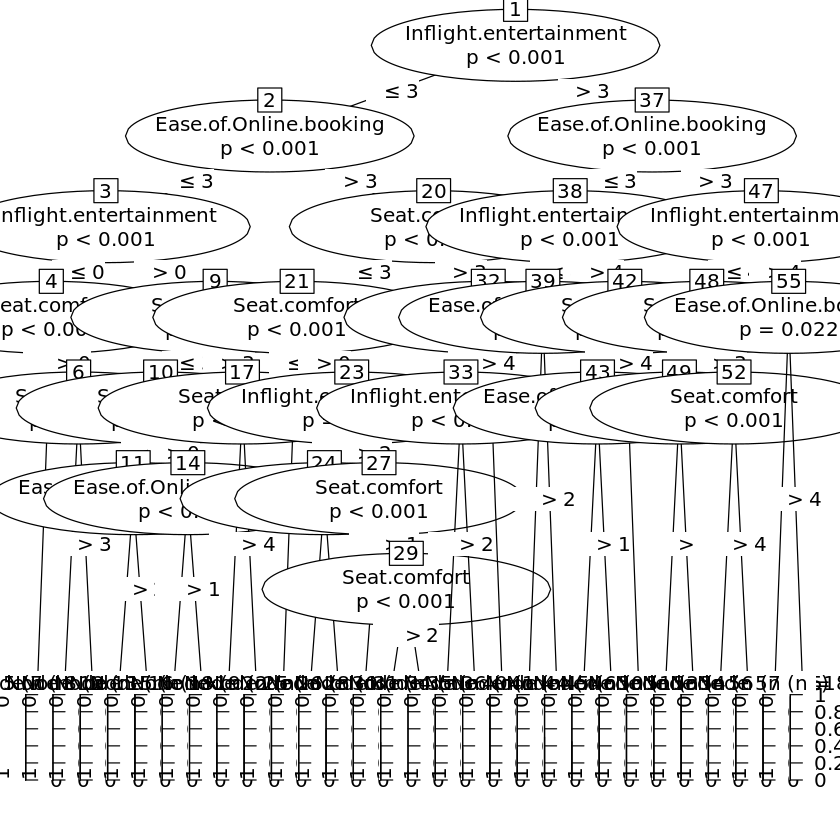

In [62]:
# check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)
print(satisfaction_ctree)
plot(satisfaction_ctree,type="simple")
plot(satisfaction_ctree)

In [76]:

# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)


        
testPred    0    1
       0 1229  225
       1  382 1403

In [77]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
81.25965

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1229  225
         1  382 1403
                                          
               Accuracy : 0.8126          
                 95% CI : (0.7987, 0.8259)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.625           
                                          
 Mcnemar's Test P-Value : 2.422e-10       
                                          
            Sensitivity : 0.7629          
            Specificity : 0.8618          
         Pos Pred Value : 0.8453          
         Neg Pred Value : 0.7860          
             Prevalence : 0.4974          
         Detection Rate : 0.3794          
   Detection Prevalence : 0.4489          
      Balanced Accuracy : 0.8123          
                                          
       'Positive' Class : 0               
                        

          Reference
Prediction    0    1
         0 1229  225
         1  382 1403

,0,1
0,1229,225
1,382,1403


Accuracy,8.125965e-01
Kappa,6.249918e-01
AccuracyLower,7.987230e-01
AccuracyUpper,8.259030e-01
AccuracyNull,5.026243e-01
AccuracyPValue,3.654368e-294
McnemarPValue,2.422473e-10


Sensitivity,0.7628802
Specificity,0.8617936
Pos Pred Value,0.8452545
Neg Pred Value,0.7859944
Precision,0.8452545
Recall,0.7628802
F1,0.8019576
Prevalence,0.4973757
Detection Rate,0.3794381
Detection Prevalence,0.4489040
Balanced Accuracy,0.8123369


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1229  225
         1  382 1403
                                          
               Accuracy : 0.8126          
                 95% CI : (0.7987, 0.8259)
    No Information Rate : 0.5026          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.625           
                                          
 Mcnemar's Test P-Value : 2.422e-10       
                                          
            Sensitivity : 0.7629          
            Specificity : 0.8618          
         Pos Pred Value : 0.8453          
         Neg Pred Value : 0.7860          
             Prevalence : 0.4974          
         Detection Rate : 0.3794          
   Detection Prevalence : 0.4489          
      Balanced Accuracy : 0.8123          
                                          
       'Positive' Class : 0               
                        

# second split

In [78]:
set.seed(1234)
ind=sample (2, nrow(data), replace=TRUE, prob=c(0.80 , 0.20))
trainData=data[ind==1,]
testData=data[ind==2,]

In [79]:
library(party)
myFormula <- satisfaction ~ Seat.comfort 
satisfaction_ctree <- ctree(myFormula, data=trainData)

   
       0    1
  0 3626 1862
  1  725 2510


	 Conditional inference tree with 5 terminal nodes

Response:  satisfaction 
Input:  Seat.comfort 
Number of observations:  8723 

1) Seat.comfort <= 4; criterion = 1, statistic = 517.681
  2) Seat.comfort <= 0; criterion = 0.962, statistic = 4.283
    3)*  weights = 307 
  2) Seat.comfort > 0
    4) Seat.comfort <= 3; criterion = 1, statistic = 149.817
      5) Seat.comfort <= 1; criterion = 1, statistic = 33.461
        6)*  weights = 1443 
      5) Seat.comfort > 1
        7)*  weights = 4045 
    4) Seat.comfort > 3
      8)*  weights = 1844 
1) Seat.comfort > 4
  9)*  weights = 1084 


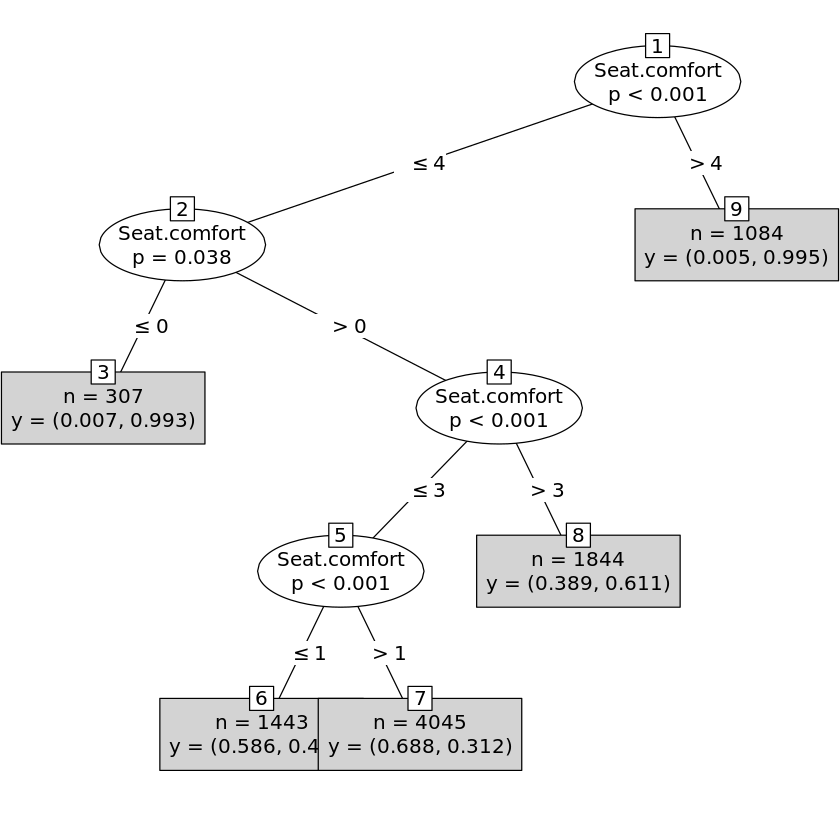

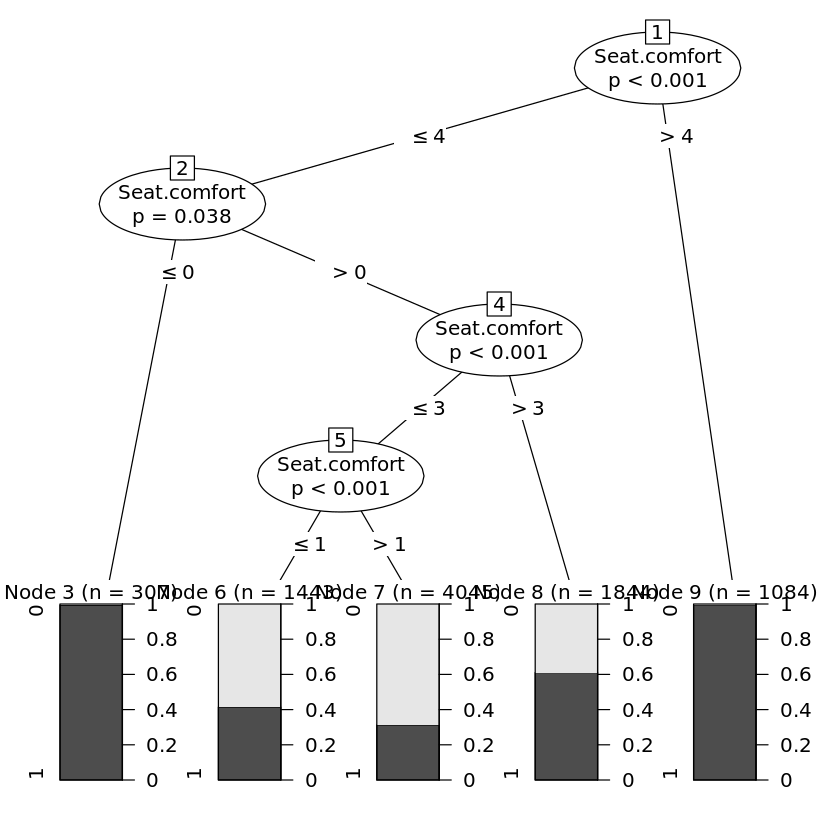

In [80]:
# check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)
print(satisfaction_ctree)
plot(satisfaction_ctree,type="simple")
plot(satisfaction_ctree)

In [81]:
# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)

        
testPred   0   1
       0 900 443
       1 196 632

In [82]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
70.56656

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 900 443
         1 196 632
                                         
               Accuracy : 0.7057         
                 95% CI : (0.686, 0.7248)
    No Information Rate : 0.5048         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.41           
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.8212         
            Specificity : 0.5879         
         Pos Pred Value : 0.6701         
         Neg Pred Value : 0.7633         
             Prevalence : 0.5048         
         Detection Rate : 0.4146         
   Detection Prevalence : 0.6186         
      Balanced Accuracy : 0.7045         
                                         
       'Positive' Class : 0              
                                         

          Reference
Prediction   0   1
         0 900 443
         1 196 632

,0,1
0,900,443
1,196,632


Accuracy,7.056656e-01
Kappa,4.099773e-01
AccuracyLower,6.859961e-01
AccuracyUpper,7.247784e-01
AccuracyNull,5.048365e-01
AccuracyPValue,1.101253e-80
McnemarPValue,2.210668e-22


Sensitivity,0.8211679
Specificity,0.5879070
Pos Pred Value,0.6701415
Neg Pred Value,0.7632850
Precision,0.6701415
Recall,0.8211679
F1,0.7380074
Prevalence,0.5048365
Detection Rate,0.4145555
Detection Prevalence,0.6186089
Balanced Accuracy,0.7045374


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 900 443
         1 196 632
                                         
               Accuracy : 0.7057         
                 95% CI : (0.686, 0.7248)
    No Information Rate : 0.5048         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.41           
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.8212         
            Specificity : 0.5879         
         Pos Pred Value : 0.6701         
         Neg Pred Value : 0.7633         
             Prevalence : 0.5048         
         Detection Rate : 0.4146         
   Detection Prevalence : 0.6186         
      Balanced Accuracy : 0.7045         
                                         
       'Positive' Class : 0              
                                         


# third split

In [83]:
set.seed(1234)
ind=sample (2, nrow(data), replace=TRUE, prob=c(0.85 , 0.15))
trainData=data[ind==1,]
testData=data[ind==2,]

In [84]:
library(party)
myFormula <- satisfaction ~ Ease.of.Online.booking 
satisfaction_ctree <- ctree(myFormula, data=trainData)

   
       0    1
  0 3091 1090
  1 1534 3567


	 Conditional inference tree with 5 terminal nodes

Response:  satisfaction 
Input:  Ease.of.Online.booking 
Number of observations:  9282 

1) Ease.of.Online.booking <= 3; criterion = 1, statistic = 1635.703
  2) Ease.of.Online.booking <= 1; criterion = 1, statistic = 56.47
    3)*  weights = 969 
  2) Ease.of.Online.booking > 1
    4) Ease.of.Online.booking <= 2; criterion = 0.994, statistic = 7.568
      5)*  weights = 1546 
    4) Ease.of.Online.booking > 2
      6)*  weights = 1666 
1) Ease.of.Online.booking > 3
  7) Ease.of.Online.booking <= 4; criterion = 1, statistic = 19.305
    8)*  weights = 2771 
  7) Ease.of.Online.booking > 4
    9)*  weights = 2330 


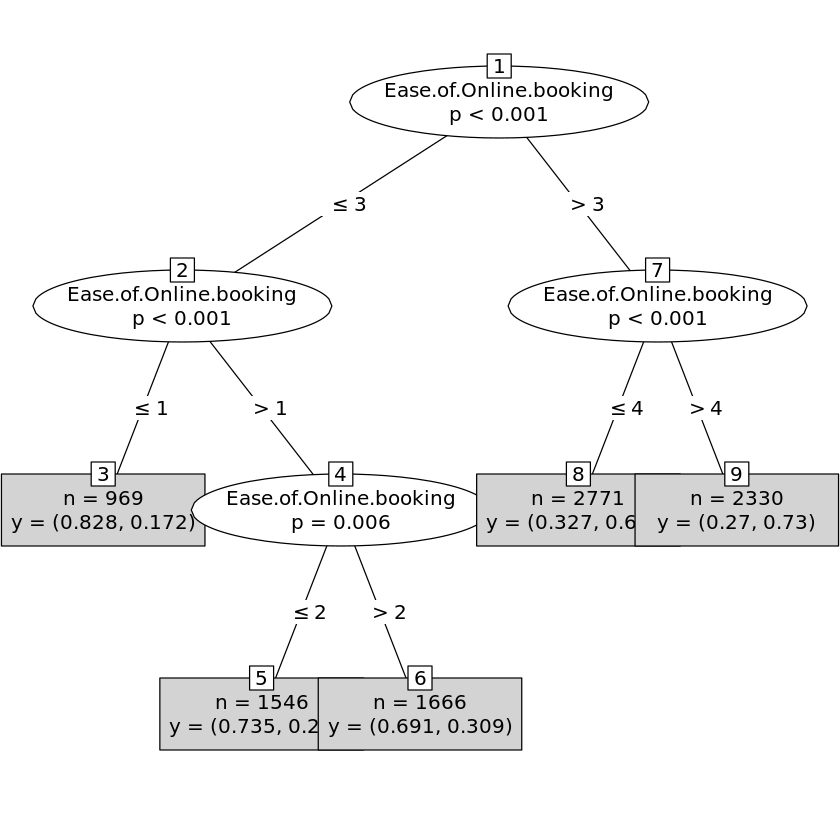

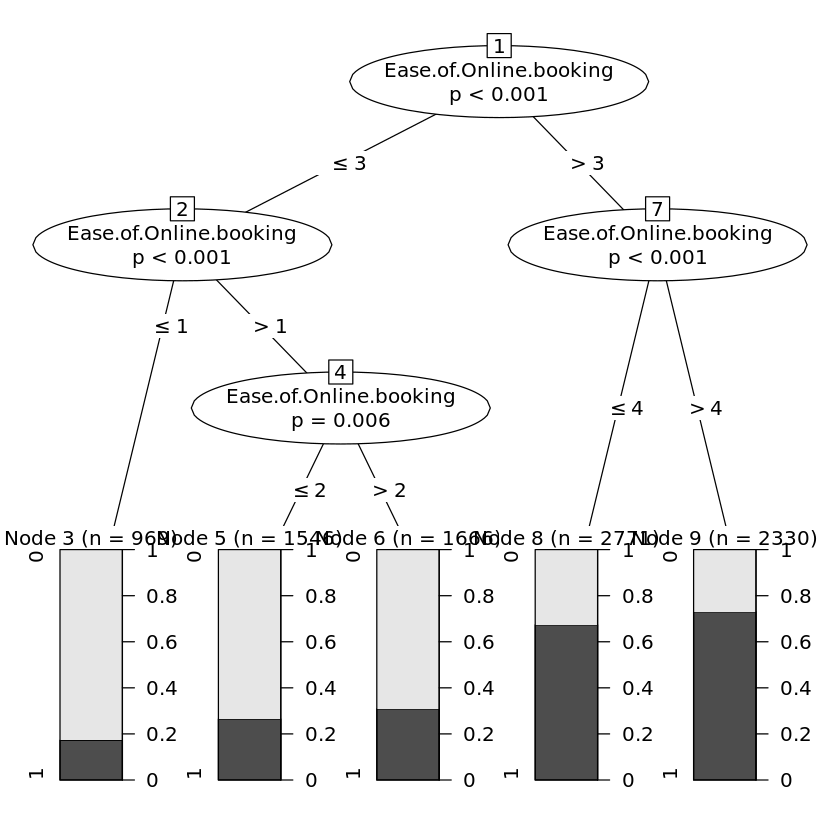

In [85]:
# check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)
print(satisfaction_ctree)
plot(satisfaction_ctree,type="simple")
plot(satisfaction_ctree)

In [86]:
# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)

        
testPred   0   1
       0 555 186
       1 267 604

In [87]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
71.89826

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 555 186
         1 267 604
                                          
               Accuracy : 0.719           
                 95% CI : (0.6963, 0.7408)
    No Information Rate : 0.5099          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4389          
                                          
 Mcnemar's Test P-Value : 0.0001708       
                                          
            Sensitivity : 0.6752          
            Specificity : 0.7646          
         Pos Pred Value : 0.7490          
         Neg Pred Value : 0.6935          
             Prevalence : 0.5099          
         Detection Rate : 0.3443          
   Detection Prevalence : 0.4597          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : 0               
                              

          Reference
Prediction   0   1
         0 555 186
         1 267 604

,0,1
0,555,186
1,267,604


Accuracy,7.189826e-01
Kappa,4.388636e-01
AccuracyLower,6.963445e-01
AccuracyUpper,7.408205e-01
AccuracyNull,5.099256e-01
AccuracyPValue,1.113204e-65
McnemarPValue,1.707794e-04


Sensitivity,0.6751825
Specificity,0.7645570
Pos Pred Value,0.7489879
Neg Pred Value,0.6934558
Precision,0.7489879
Recall,0.6751825
F1,0.7101727
Prevalence,0.5099256
Detection Rate,0.3442928
Detection Prevalence,0.4596774
Balanced Accuracy,0.7198697


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 555 186
         1 267 604
                                          
               Accuracy : 0.719           
                 95% CI : (0.6963, 0.7408)
    No Information Rate : 0.5099          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4389          
                                          
 Mcnemar's Test P-Value : 0.0001708       
                                          
            Sensitivity : 0.6752          
            Specificity : 0.7646          
         Pos Pred Value : 0.7490          
         Neg Pred Value : 0.6935          
             Prevalence : 0.5099          
         Detection Rate : 0.3443          
   Detection Prevalence : 0.4597          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : 0               
                              

 نقرر مين احسن 

# 7.2 - Clustering :

In [93]:
install.packages("multcomp") 
library(multcomp)
install.packages('factoextra')
library(factoextra)     # get_clust_tendency() assesses hopkins stat
install.packages("tidyverse") 
library(tidyverse) 

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ strucchange::boundary() masks stringr::boundary()
✖ randomForest::combine() masks dplyr::combine()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::lag()            masks stats::lag()
✖ purrr::lift()           masks caret::lift()
✖ randomForest::margin()  masks ggplot2::margin()
✖ MASS::select()          masks dplyr::select()



In [ ]:
 
data <- data[,!names(data) %in% c("satisfaction","Inflight.wifi.service","Departure.Arrival.time.convenient","Age")] 
 
head(data) 
 
 
 
#Making changes for converting data types 
 
#Converting interger&factor columns too numeric 
data$Gender<- as.numeric(data$Gender ) 
data$Customer.Type <- as.numeric(data$Customer.Type ) 
data$Age <- as.numeric(data$Age ) 
data$Type.of.Travel  <- as.numeric(data$Type.of.Travel  ) 
data$Class <- as.numeric(data$Class  ) 
data$Seat.comfort <- as.numeric(data$Seat.comfort ) 
data$Departure.Arrival.time.convenient <- as.numeric(data$Departure.Arrival.time.convenient ) 
data$Inflight.wifi.service <- as.numeric(data$Inflight.wifi.service) 
data$Inflight.entertainment <- as.numeric(data$Inflight.entertainment) 
data$Ease.of.Online.booking <- as.numeric(data$Ease.of.Online.booking) 
data$Online.support <- as.numeric(data$Online.support) 
data$Food.and.drink <- as.numeric(data$Food.and.drink)
data$Arrival.Delay.in.Minutes <- as.numeric(data$Arrival.Delay.in.Minutes)
data$On.board.service <- as.numeric(data$On.board.service)
data$Leg.room.service <- as.numeric(data$Leg.room.service)
data$Baggage.handling <- as.numeric(data$Baggage.handling)
data$Checkin.service <- as.numeric(data$Checkin.service)
data$Cleanliness <- as.numeric(data$Cleanliness)
data$Online.boarding <- as.numeric(data$Online.boarding)
 
#for ease creating a data set without color column 
data_no_color <- data[1:19] 
 
#Let us see the structure again 
str(data_no_color) 